# Online Predictive Coding
In this notebook, we implement the first version of our prototype for learning from varying feature spaces.

## Model Design
- add the plot we have on the desktop computer here.

In [22]:
import numpy as np
import pandas as pd

class error_module:
    def __init__(self, size, lr):
        self.w = np.zeros(size)
        self.lr = lr
        
    def predict(self, x):
        return np.dot(self.w, x)
    
    def update(self, x, y):
        yhat = self.predict(x)  # regression
        loss = 0.5 * (y - yhat)**2
        self.w += self.lr * (y - yhat)
        return loss
        
        
class classifier_module:
    def __init__(self, size, lr):
        self.w = np.zeros(size)
        self.lr = lr
        
    def predict(self, x):
        return np.dot(self.w, x)

    def update(self, x, y):
        loss = np.maximum(0, 1.0 - y * np.dot(self.w, x))
        if loss > 0: self.w += x * y * self.lr
        return loss


In [23]:
dataset_names = ["german", "ionosphere", "spambase", "magic", "a8a"]
root_path, extension = "./datasets/", "_numeric"


def get_path(name):
    '''returns a path pair to the preprocessed datasets
    X and y csv files.'''
    path = root_path + name + extension
    return path + "_X.csv", path + "_y.csv"


def read_dataset(X_path, y_path):
    '''reads and returns numpy arrays in a given pair of paths for 
    X and y.'''
    X = pd.read_csv(X_path).values
    y = pd.read_csv(y_path)['0'].values
    return X, y


def simulate_varying(X):  # multivariate normal distribution
    '''Get the data and generate a varying feature space pattern.
    Possible concerns: thresholding messing up the distribution?'''
    
    # create a covariance matrix
    cov = np.random.rand(num_features, num_features)
    cov = np.dot(cov, cov.transpose())  # to have a positive semi-definite matrix
    
    # create a mean vector
    mean = np.random.rand(len(X[0]))
    
    # sample from multivariate gaussian w/ given mean and cov
    spaces = np.random.multivariate_normal(mean, cov, len(X))
    
    # threshold samples for 1-hot encoding
    spaces[spaces < 0] = 0
    spaces[spaces != 0] = 1

    return spaces


def simulate_random_varying(X): # discrete uniform distribution
    matrix = np.random.randint(2, size=(len(X), len(X[0])))  
    return matrix



def quant(x,l):
    one_hot = []
    for i in x:
        if i != 0:
            one_hot.append(1)
        else:
            one_hot.append(0)
    one_hot = np.array(one_hot)
    qts=[x]
    for i in range(l):
        qt = (one_hot-x) * (i+1) / l
        qts.append(x+qt)
    qts.append(one_hot)
    
    return qts

In [57]:
X_path, y_path = get_path("ionosphere")
X, y = read_dataset(X_path, y_path)
num_features = len(X[0])
folds = 20
learning_rate = 0.01

In [58]:
# multivariate gaussian mask with threshold 0

fold_error_rates = []
predictions = []
losses = []

for f in range(folds):
    error_count = 0
    
    # shuffle for each fold
    l = list(range(len(X)))
    np.random.shuffle(l)
    X, y = X[l], y[l]
    mask = simulate_varying(X)  # multivariate
    
    # initialize model
    model = classifier_module(num_features, learning_rate)
    #model = error_module(num_features, learning_rate)

    for i in range(len(X)):
        # predict and suffer
        yhat = model.predict(X[i] * mask[i])
        loss = model.update(X[i] * mask[i], y[i])
        
        # bookkeeping
        predictions.append(yhat)
        losses.append(loss)
        
        if np.sign(yhat) != y[i]:
            error_count += 1
        
    fold_error_rates.append(error_count/len(X))

print(learning_rate, np.mean(fold_error_rates))

0.01 0.42614285714285705


In [59]:
class OnlinePredictiveCoding:
    def __init__(self, num_layers, num_features):
        self.classifier = classifier_module(num_features, learning_rate)
        self.num_layers = num_layer
        self.num_features = num_features
        
        self.error_modules = []
        for i in range(num_layers - 1): -xt
            self.error_modules.append(error_module(num_features, learning_rate))
    
    def forward(self, x, y):
        input_list = quant(x, num_layers)
        input_list.reverse()
        
        for i in range(len(input_list)):
            xi = input_list[i]
            
            if i == len(input_list) - 1:
                model = self.classifier
                
            else:
                model = self.error_modules[i]
                
            yhati = model.predict(xi)
            lossi = 
                
                
                

            
            
        
        
        
            
        

IndentationError: unexpected indent (<ipython-input-59-90064598c6b9>, line 9)

In [60]:
opc = OnlinePredictiveCoding(3, 20)

NameError: name 'OnlinePredictiveCoding' is not defined

In [83]:
result = quant(X[6], 2)

In [84]:
import matplotlib.pyplot as plt

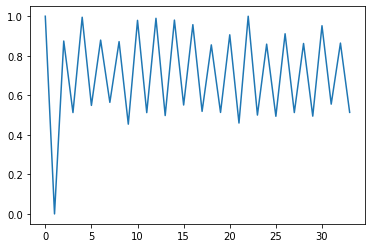

In [85]:
plt.plot(result[0])

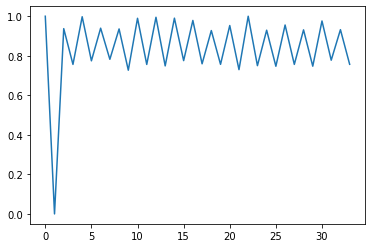

In [86]:
plt.plot(result[1])

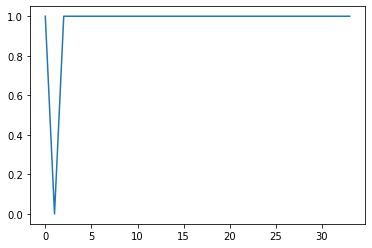

In [87]:
plt.plot(result[2])

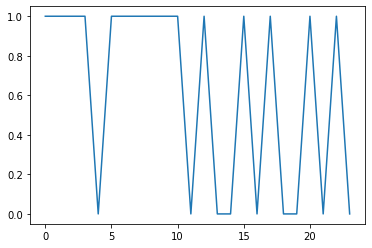

In [56]:
plt.plot(result[3])